Contributors:
Kaixiang Liu
Jahn Tibayan
Jake Souza

In [1]:
# Packages
%pip install pandas
%pip install scikit-learn
%pip install matplotlib
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor

Exploring CSUF Kinesiology dataset and predict total fitness factor score for each student

# Data prepartion

In [3]:
df = pd.read_csv('Health-Science-Data.csv', index_col=None, skip_blank_lines=True)
df.head()

,Idnum,Date,Sex,Age,Ht,Wt,RF 2,RF 3,RF 4,RF 5,...,Unnamed: 161,Unnamed: 162,Unnamed: 163,Unnamed: 164,Unnamed: 165,Unnamed: 166,Unnamed: 167,Unnamed: 168,Unnamed: 169,Unnamed: 170
0,M0001,2002-2,M,19,65.0,195.4,5,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,M0002,2002-2,M,19,68.5,201.4,5,2,2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,M0003,2002-2,M,21,69.8,133.8,5,2,6,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,M0004,2002-2,M,18,66.0,148.0,5,1,6,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,M0005,2002-2,M,23,67.0,148.7,5,2,6,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6276 entries, 0 to 6275
Columns: 171 entries, Idnum to Unnamed: 170
dtypes: float64(152), int64(16), object(3)
memory usage: 8.2+ MB


,Age,Ht,Wt,RF 2,RF 3,RF 4,RF 5,BIA_percent_Fat,SF 1,SF 2,...,Unnamed: 161,Unnamed: 162,Unnamed: 163,Unnamed: 164,Unnamed: 165,Unnamed: 166,Unnamed: 167,Unnamed: 168,Unnamed: 169,Unnamed: 170
count,6276.000000,6276.000000,6276.000000,6276.000000,6276.000000,6276.000000,6276.000000,1596.000000,4680.000000,4680.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,19.597196,66.210747,147.396303,2.695347,2.442798,1.288400,0.163639,20.046805,16.682874,21.135609,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.496967,3.820155,33.001523,1.976818,0.700195,0.783088,0.604754,7.996257,8.593706,9.838017,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,18.000000,55.000000,82.000000,1.000000,1.000000,1.000000,0.000000,4.000000,2.000000,4.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,19.000000,63.000000,123.300000,1.000000,2.000000,1.000000,0.000000,14.100000,10.000000,13.500000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,19.000000,66.000000,142.000000,1.000000,2.000000,1.000000,0.000000,19.900000,16.000000,19.500000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,20.000000,69.000000,166.400000,5.000000,3.000000,1.000000,0.000000,25.600000,21.900000,27.500000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,25.000000,78.000000,329.000000,5.000000,6.000000,6.000000,6.000000,46.400000,50.000000,60.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])


BIA_percent_Fat    4680
SF 1               1596
SF 2               1596
SF 3               1596
Waist              5528
                   ... 
Unnamed: 166       6276
Unnamed: 167       6276
Unnamed: 168       6276
Unnamed: 169       6276
Unnamed: 170       6276
Length: 144, dtype: int64


In [6]:

pd.set_option('display.max_columns', None) 
print(df.columns)


Index(['Idnum', 'Date', 'Sex', 'Age', 'Ht', 'Wt', 'RF 2', 'RF 3', 'RF 4',
       'RF 5',
       ...
       'Unnamed: 161', 'Unnamed: 162', 'Unnamed: 163', 'Unnamed: 164',
       'Unnamed: 165', 'Unnamed: 166', 'Unnamed: 167', 'Unnamed: 168',
       'Unnamed: 169', 'Unnamed: 170'],
      dtype='object', length=171)


# 1. Exploratorty Data Analysis

From the data dictionary, we selected five variables that are likely to be important. They are: [Age,Wt,Ht,BIA_percent_Fat,Waist]

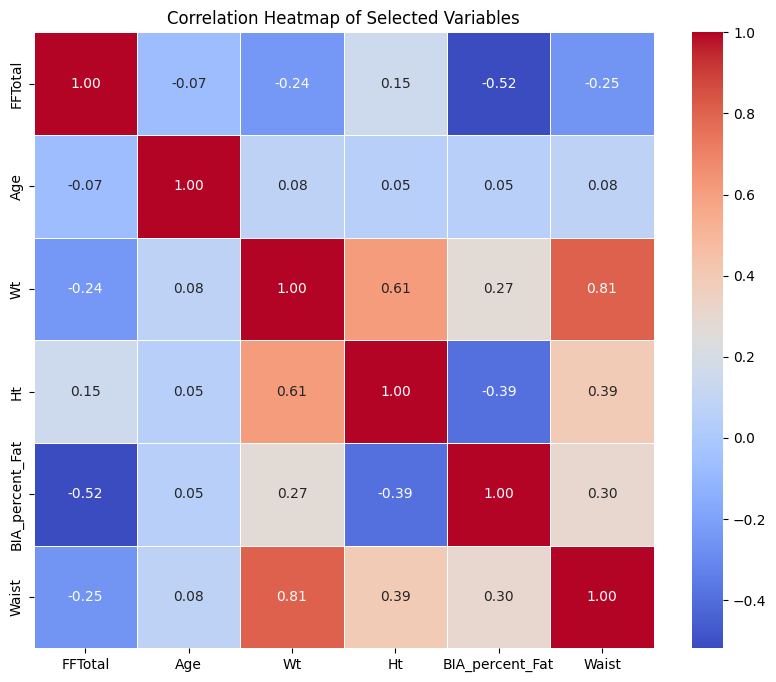

In [7]:
# Correlation heatmap
selected_vars = ['FFTotal', 'Age', 'Wt', 'Ht', 'BIA_percent_Fat', 'Waist']
correlation_matrix = df[selected_vars].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Selected Variables')
plt.show()


However, it seems like the only variable that is related to FFTotal is BIA_Percent_Fat. Now we use a random forrest model to determine the most important features

First, we need to do some data preprocessing

In [8]:
na_counts_sorted = df.isna().sum().sort_values(ascending=False)
print(na_counts_sorted)

Unnamed: 37    6276
Unnamed: 36    6276
Unnamed: 35    6276
Unnamed: 42    6276
Unnamed: 41    6276
               ... 
DBP               0
HR rest           0
Stages            0
PL 1              0
HR 1              0
Length: 171, dtype: int64


In [9]:
# convert 'Sex' column: M -> 1, F -> 2
df['Sex'] = df['Sex'].replace({'M': 1, 'F': 2})

print(df['Sex'].head())


0    1
1    1
2    1
3    1
4    1
Name: Sex, dtype: int64


C:\Users\Jahn\AppData\Local\Temp\ipykernel_2192\3688870694.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sex'] = df['Sex'].replace({'M': 1, 'F': 2})


In [10]:
# There are a bunch of empty columns. Not sure why they were included, they are just pure blanks
# We are dropping columns where all values are na
df = df.dropna(axis=1, how='all')

# Verify that the empty columns are gone
print(df.info())




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6276 entries, 0 to 6275
Data columns (total 35 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Idnum            6276 non-null   object 
 1   Date             6276 non-null   object 
 2   Sex              6276 non-null   int64  
 3   Age              6276 non-null   int64  
 4   Ht               6276 non-null   float64
 5   Wt               6276 non-null   float64
 6   RF 2             6276 non-null   int64  
 7   RF 3             6276 non-null   int64  
 8   RF 4             6276 non-null   int64  
 9   RF 5             6276 non-null   int64  
 10  BIA_percent_Fat  1596 non-null   float64
 11  SF 1             4680 non-null   float64
 12  SF 2             4680 non-null   float64
 13  SF 3             4680 non-null   float64
 14  Waist            748 non-null    float64
 15  FF               6276 non-null   float64
 16  RGM              6276 non-null   float64
 17  LGM           

In [11]:
# Next we need to drop two columns that have high number of missing values
# They are Waist and BIA_percent_Fat
df = df.drop(columns=['Waist', 'BIA_percent_Fat'])


In [12]:
# Next, fill skinFold values, SF, with an imputer
# This imputer will look at the other columns, specified and predict the missing values
# This is a better method than using pure mean or median values, though those values are robust, we just want to be more accurate
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Select the variables for imputation
columns_to_impute = ['SF 1', 'SF 2', 'SF 3', 'Age', 'Ht', 'Wt', 'Sex', 'FF', 'RGM', 'LGM', 'Stages']

# Apply the imputer
imputer = IterativeImputer(random_state=42)
df[columns_to_impute] = imputer.fit_transform(df[columns_to_impute])

# Verify the results
print(df[['SF 1', 'SF 2', 'SF 3']].isna().sum())


SF 1    0
SF 2    0
SF 3    0
dtype: int64


In [13]:
# For the remaining missing values, we will use the median value for each column
# Fill missing values in SF 1, SF 2, and SF 3 with their respective medians
df['RPE 3'] = df['RPE 3'].fillna(df['RPE 3'].median())
df['HR 3'] = df['HR 2'].fillna(df['HR 2'].median())
df['PL 3'] = df['PL 3'].fillna(df['PL 3'].median())


In [14]:
na_counts_sorted = df.isna().sum().sort_values(ascending=False)
print(na_counts_sorted)



Idnum      0
Date       0
Sex        0
Age        0
Ht         0
Wt         0
RF 2       0
RF 3       0
RF 4       0
RF 5       0
SF 1       0
SF 2       0
SF 3       0
FF         0
RGM        0
LGM        0
VC         0
TA         0
PB         0
SBP        0
DBP        0
HR rest    0
Stages     0
PL 1       0
HR 1       0
RPE 1      0
PL 2       0
HR 2       0
RPE 2      0
PL 3       0
HR 3       0
RPE 3      0
FFTotal    0
dtype: int64


Now we have finished data preprocessing, we can use a RandomForest model to obtain the most important features.

In [15]:

# Define X (predictor variables) and y (target variable)
X = df.drop(columns=['FFTotal', 'Idnum', 'Date'])  # Exclude the target and irrelevant columns
y = df['FFTotal']  # Target variable

# Train a random forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X, y)

# Extract feature importances
importances = rf_model.feature_importances_

# Create a DataFrame of feature importance
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importances)


    Feature  Importance
9      SF 2    0.300004
11       FF    0.163065
25     HR 2    0.088636
28     HR 3    0.084030
8      SF 1    0.072195
10     SF 3    0.051469
12      RGM    0.047641
14       VC    0.027811
3        Wt    0.023910
13      LGM    0.021670
24     PL 2    0.020073
27     PL 3    0.011676
22     HR 1    0.011648
18      DBP    0.009003
16       PB    0.008949
17      SBP    0.008842
2        Ht    0.008517
29    RPE 3    0.007071
26    RPE 2    0.005941
23    RPE 1    0.005779
1       Age    0.004787
15       TA    0.003836
20   Stages    0.002984
19  HR rest    0.002915
5      RF 3    0.002761
6      RF 4    0.001663
7      RF 5    0.001038
21     PL 1    0.000892
0       Sex    0.000659
4      RF 2    0.000536


Now visualize the most important features

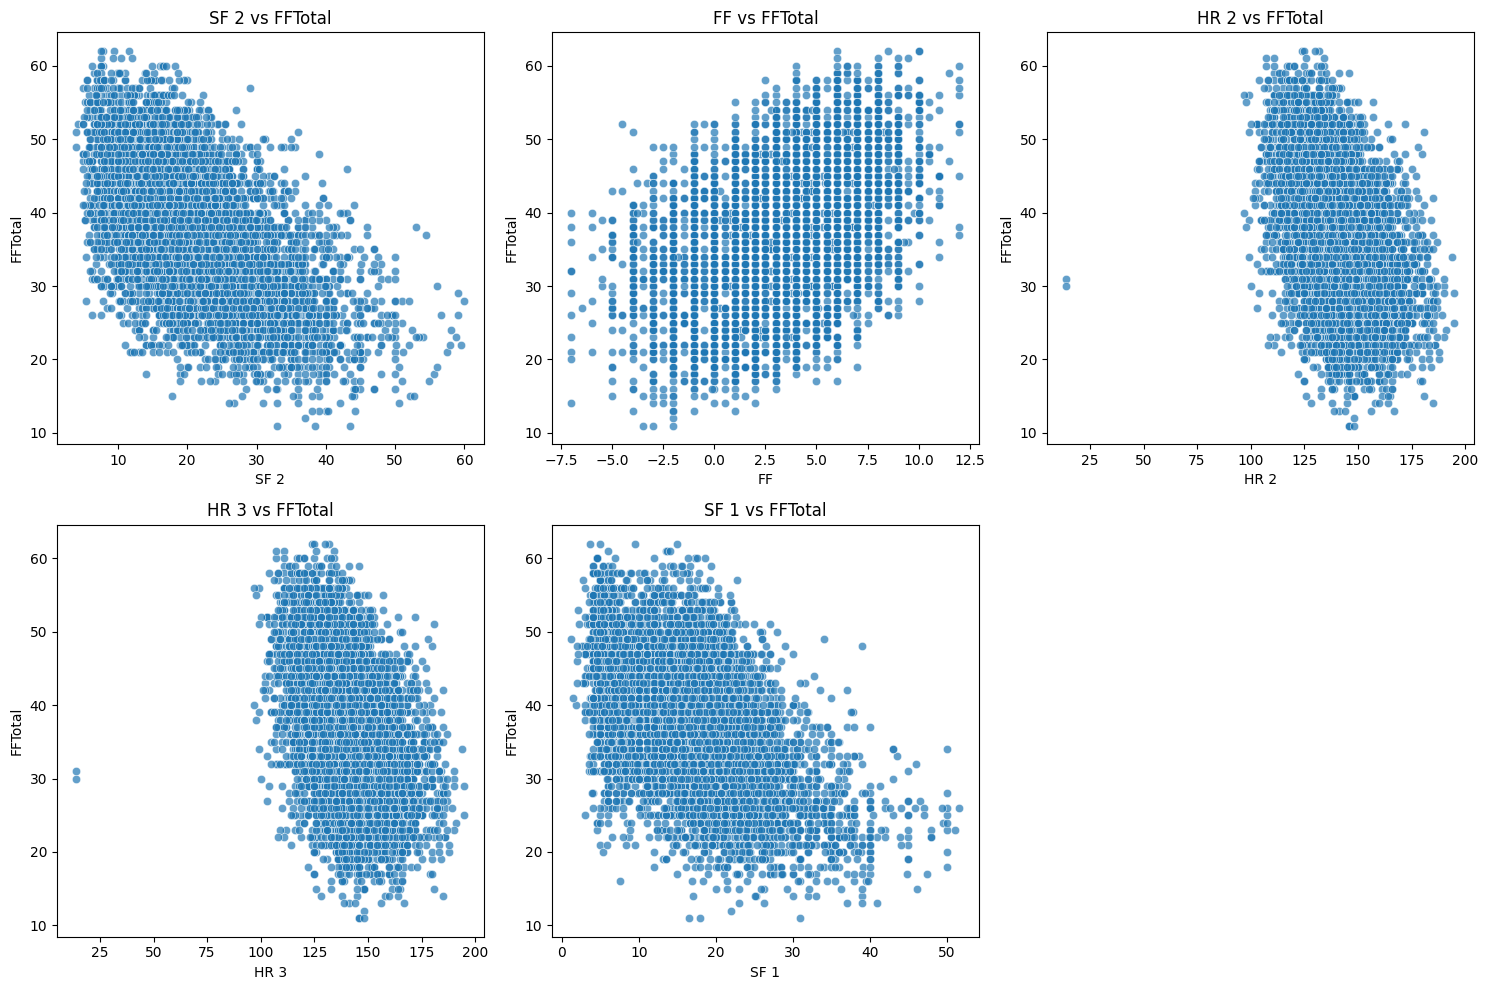

In [16]:


# List of top 5 features
top_features = ['SF 2', 'FF', 'HR 2', 'HR 3', 'SF 1']

# Create scatter plots for each feature against FFTotal
plt.figure(figsize=(15, 10))
for i, feature in enumerate(top_features, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(data=df, x=feature, y='FFTotal', alpha=0.7)
    plt.title(f'{feature} vs FFTotal')
    plt.xlabel(feature)
    plt.ylabel('FFTotal')

plt.tight_layout()
plt.show()


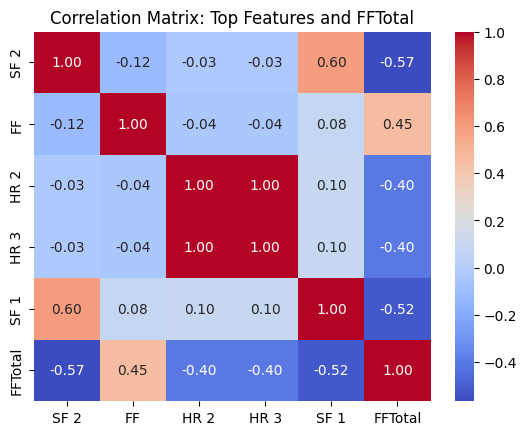

In [17]:
# Heatmap for correlations
import seaborn as sns
import matplotlib.pyplot as plt

top_features = ['SF 2', 'FF', 'HR 2', 'HR 3', 'SF 1', 'FFTotal']
correlation_matrix = df[top_features].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix: Top Features and FFTotal')
plt.show()


From these visualizations, we can see that the top five features are: ['SF 2', 'FF', 'HR 2', 'HR 3', 'SF 1']

These represent:
SF 2: Skinfold 2 (mm) : Male - abdomen / Female suprailium
FF: Forward fl (in) : Sit-and-reach - best of 3 trials to closest 0.5 in
HR 2: Heart Rate Stage 2 : Heart rate at end of stage 2 - determined by Polar HR monitor or palpation
HR 3: Heart Rate Stage 3 : Heart rate at end of stage 3 - determined by Polar HR monitor or palpation
SF 1: Skinfold 1 (mm) : Male - chest / Female - triceps - measured to closest 0.5 mm 2-3 times

# 2. Linear model to predict FFTotal

- Generate some (at least 3) transformed variables. E.g., these could combine variables (e.g., bmi = Wt / Ht**2).
- Split your dataset into equal-sized train and test subsets (randomly chosen): The train subset should be used for building/training the linear models. Use statsmodels or scikit-learn as appropriate.
- Run linear regression with at least 5 different combinations of predictor variables. Hint: a model created with the statsmodels formula API might look like: FFTotal ~ Age + Wt + Waist



1. Generate 3 Transformed variables
Based on our fitness knowledge, we have decided to transform three variables:
- BMI
- Skinfold Thickness Ratio
- Forward Flexion (Sit-and-Reach) Relative to Height

In [26]:
# Create the new dataframe with only the selected and transformed features:

top_features = ['SF 2', 'FF', 'HR 2', 'HR 3', 'SF 1', 'FFTotal']

# Creating a new dataframe with selected features and transformations
df_selected = df[top_features].copy()

# Calculate BMI (weight in pounds, height in inches)
df_selected['BMI'] = (df['Wt'] / (df['Ht'] ** 2)) * 703

# Calculate Skinfold Ratio (SF 2 / SF 1)
df_selected['SF_Ratio'] = df['SF 2'] / df['SF 1']

# Calculate Forward Flexion per Height (using height in inches)
df_selected['FF_per_Height'] = df['FF'] / df['Ht']

# Display the transformed dataframe to verify
df_selected[['BMI', 'SF_Ratio', 'FF_per_Height']].head()

df = df_selected


2. Split dataset into equal-sized train and test subsets

In [27]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(df, test_size=0.5, random_state=42)


3. Run Linear Regression with at least 5 different combinations

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# First standarize the features

scaler = StandardScaler()

# Fit the scaler on the training data and transform it
train_data_scaled = scaler.fit_transform(train_data)

# Transform the test data using the same scaler
test_data_scaled = scaler.transform(test_data)

# Data is now ready for a linear model 
train_data_scaled = pd.DataFrame(train_data_scaled, columns=train_data.columns)
test_data_scaled = pd.DataFrame(test_data_scaled, columns=test_data.columns)


3. Model 1

Combination 1 - Predictions: [ 0.20075872  0.41534887  0.28422774  0.11493004 -0.62979829]
Root Mean Squared Error (RMSE): 0.5432347697567773
R-squared (R²): 0.6910376878475881
Mean Absolute Error (MAE): 0.43170761762386195


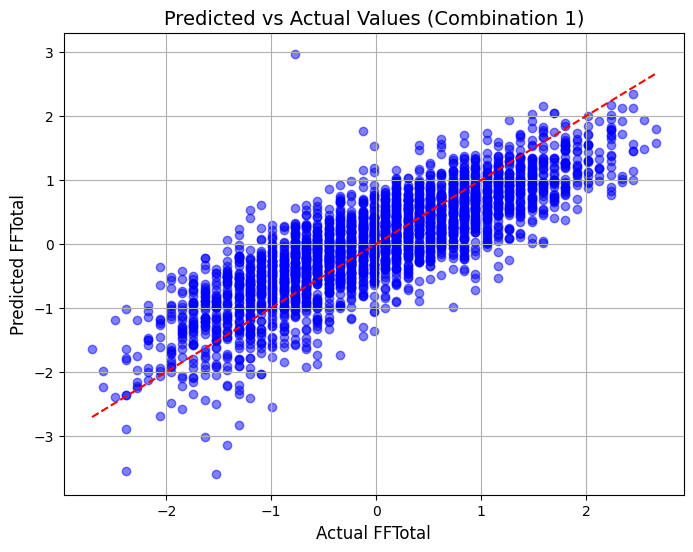

In [32]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Select features for Combination 1
features_1 = ['SF 2', 'FF', 'HR 2', 'HR 3', 'SF 1']

# Prepare the data
X_train_1 = train_data_scaled[features_1]
y_train_1 = train_data_scaled['FFTotal']
X_test_1 = test_data_scaled[features_1]
y_test_1 = test_data_scaled['FFTotal']

# Initialize and fit the linear regression model
model_1 = LinearRegression()
model_1.fit(X_train_1, y_train_1)

# Predict and evaluate the model
y_pred_1 = model_1.predict(X_test_1)

# Display predictions for the first 5 samples
print(f"Combination 1 - Predictions: {y_pred_1[:5]}")

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test_1, y_pred_1))  # Root Mean Squared Error
r2 = r2_score(y_test_1, y_pred_1)  # R-squared
mae = mean_absolute_error(y_test_1, y_pred_1)  # Mean Absolute Error

# Display the evaluation results
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")
print(f"Mean Absolute Error (MAE): {mae}")

# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(y_test_1, y_pred_1, color='blue', alpha=0.5)
plt.plot([min(y_test_1), max(y_test_1)], [min(y_test_1), max(y_test_1)], color='red', linestyle='--')  # Line of perfect prediction
plt.title('Predicted vs Actual Values (Combination 1)', fontsize=14)
plt.xlabel('Actual FFTotal', fontsize=12)
plt.ylabel('Predicted FFTotal', fontsize=12)
plt.grid(True)
plt.show()

3. Model 2

Combination 1 - Predictions: [ 0.55893385  0.50717292 -0.03873465  0.37315241 -0.78272475]
Root Mean Squared Error (RMSE): 0.6666275323199046
R-squared (R²): 0.5347387522536631
Mean Absolute Error (MAE): 0.5370248107637634


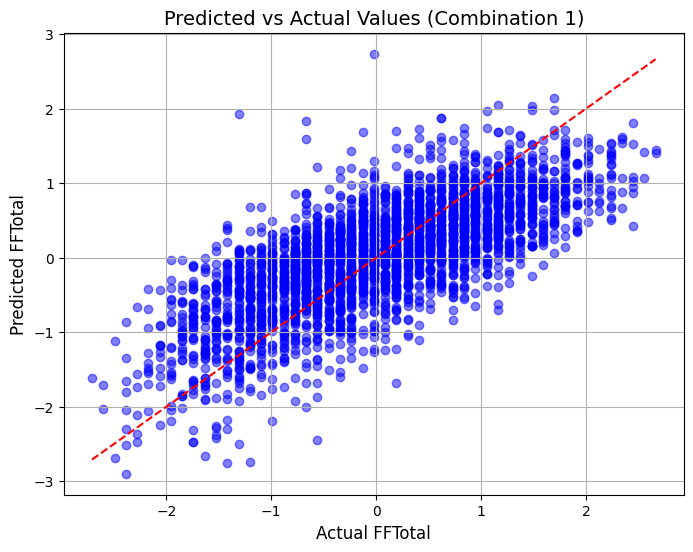

In [33]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Select features for Combination 1
features_1 = ['SF 2', 'FF', 'BMI', 'SF_Ratio', 'FF_per_Height']

# Prepare the data
X_train_1 = train_data_scaled[features_1]
y_train_1 = train_data_scaled['FFTotal']
X_test_1 = test_data_scaled[features_1]
y_test_1 = test_data_scaled['FFTotal']

# Initialize and fit the linear regression model
model_1 = LinearRegression()
model_1.fit(X_train_1, y_train_1)

# Predict and evaluate the model
y_pred_1 = model_1.predict(X_test_1)

# Display predictions for the first 5 samples
print(f"Combination 1 - Predictions: {y_pred_1[:5]}")

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test_1, y_pred_1))  # Root Mean Squared Error
r2 = r2_score(y_test_1, y_pred_1)  # R-squared
mae = mean_absolute_error(y_test_1, y_pred_1)  # Mean Absolute Error

# Display the evaluation results
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")
print(f"Mean Absolute Error (MAE): {mae}")

# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(y_test_1, y_pred_1, color='blue', alpha=0.5)
plt.plot([min(y_test_1), max(y_test_1)], [min(y_test_1), max(y_test_1)], color='red', linestyle='--')  # Line of perfect prediction
plt.title('Predicted vs Actual Values (Combination 1)', fontsize=14)
plt.xlabel('Actual FFTotal', fontsize=12)
plt.ylabel('Predicted FFTotal', fontsize=12)
plt.grid(True)
plt.show()

3. Model 3

Combination 1 - Predictions: [ 0.69584198  0.5850105   0.12991675 -0.54596609 -0.92656042]
Root Mean Squared Error (RMSE): 0.6455462442674582
R-squared (R²): 0.5637001077703205
Mean Absolute Error (MAE): 0.5213298906308717


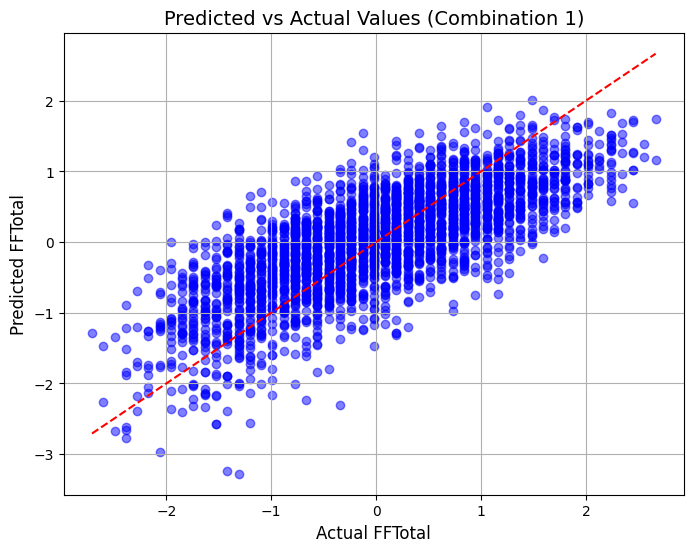

In [34]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Select features for Combination 1
features_1 = ['SF 2', 'SF 1', 'BMI', 'SF_Ratio', 'FF_per_Height']

# Prepare the data
X_train_1 = train_data_scaled[features_1]
y_train_1 = train_data_scaled['FFTotal']
X_test_1 = test_data_scaled[features_1]
y_test_1 = test_data_scaled['FFTotal']

# Initialize and fit the linear regression model
model_1 = LinearRegression()
model_1.fit(X_train_1, y_train_1)

# Predict and evaluate the model
y_pred_1 = model_1.predict(X_test_1)

# Display predictions for the first 5 samples
print(f"Combination 1 - Predictions: {y_pred_1[:5]}")

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test_1, y_pred_1))  # Root Mean Squared Error
r2 = r2_score(y_test_1, y_pred_1)  # R-squared
mae = mean_absolute_error(y_test_1, y_pred_1)  # Mean Absolute Error

# Display the evaluation results
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")
print(f"Mean Absolute Error (MAE): {mae}")

# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(y_test_1, y_pred_1, color='blue', alpha=0.5)
plt.plot([min(y_test_1), max(y_test_1)], [min(y_test_1), max(y_test_1)], color='red', linestyle='--')  # Line of perfect prediction
plt.title('Predicted vs Actual Values (Combination 1)', fontsize=14)
plt.xlabel('Actual FFTotal', fontsize=12)
plt.ylabel('Predicted FFTotal', fontsize=12)
plt.grid(True)
plt.show()

3. Model 4

Combination 1 - Predictions: [ 0.09714832  0.41266447  0.0280502   0.88502064 -0.38985881]
Root Mean Squared Error (RMSE): 0.5882529387693465
R-squared (R²): 0.6377081210346571
Mean Absolute Error (MAE): 0.4683644589331348


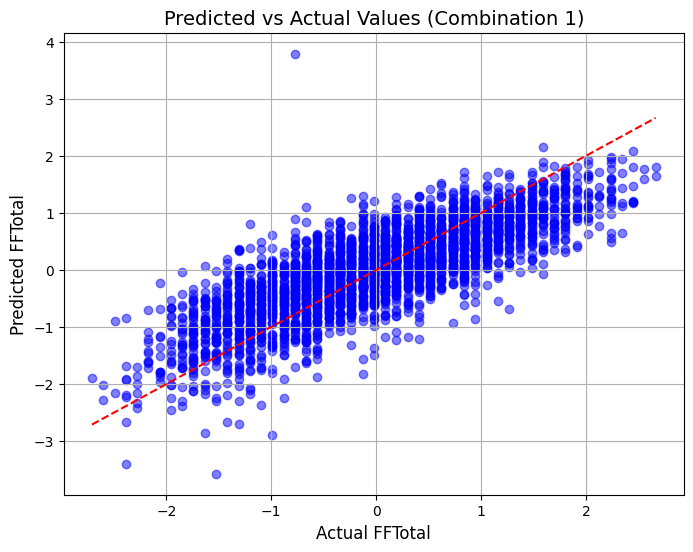

In [35]:
# Select features for Combination 1
features_1 = ['SF 2', 'FF', 'HR 2', 'HR 3', 'BMI']

# Prepare the data
X_train_1 = train_data_scaled[features_1]
y_train_1 = train_data_scaled['FFTotal']
X_test_1 = test_data_scaled[features_1]
y_test_1 = test_data_scaled['FFTotal']

# Initialize and fit the linear regression model
model_1 = LinearRegression()
model_1.fit(X_train_1, y_train_1)

# Predict and evaluate the model
y_pred_1 = model_1.predict(X_test_1)

# Display predictions for the first 5 samples
print(f"Combination 1 - Predictions: {y_pred_1[:5]}")

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test_1, y_pred_1))  # Root Mean Squared Error
r2 = r2_score(y_test_1, y_pred_1)  # R-squared
mae = mean_absolute_error(y_test_1, y_pred_1)  # Mean Absolute Error

# Display the evaluation results
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")
print(f"Mean Absolute Error (MAE): {mae}")

# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(y_test_1, y_pred_1, color='blue', alpha=0.5)
plt.plot([min(y_test_1), max(y_test_1)], [min(y_test_1), max(y_test_1)], color='red', linestyle='--')  # Line of perfect prediction
plt.title('Predicted vs Actual Values (Combination 1)', fontsize=14)
plt.xlabel('Actual FFTotal', fontsize=12)
plt.ylabel('Predicted FFTotal', fontsize=12)
plt.grid(True)
plt.show()

3. Model 5

Combination 1 - Predictions: [-0.15439574  0.17758827 -0.04044056  0.78706803  0.2051012 ]
Root Mean Squared Error (RMSE): 0.6384558996276766
R-squared (R²): 0.5732316567174648
Mean Absolute Error (MAE): 0.5071787457598887


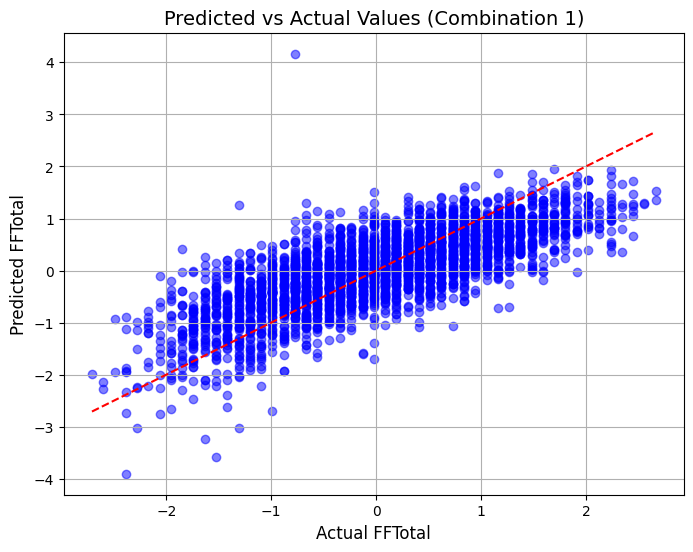

In [36]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Select features for Combination 1
features_1 = ['BMI', 'FF', 'HR 2', 'HR 3', 'SF_Ratio']

# Prepare the data
X_train_1 = train_data_scaled[features_1]
y_train_1 = train_data_scaled['FFTotal']
X_test_1 = test_data_scaled[features_1]
y_test_1 = test_data_scaled['FFTotal']

# Initialize and fit the linear regression model
model_1 = LinearRegression()
model_1.fit(X_train_1, y_train_1)

# Predict and evaluate the model
y_pred_1 = model_1.predict(X_test_1)

# Display predictions for the first 5 samples
print(f"Combination 1 - Predictions: {y_pred_1[:5]}")

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test_1, y_pred_1))  # Root Mean Squared Error
r2 = r2_score(y_test_1, y_pred_1)  # R-squared
mae = mean_absolute_error(y_test_1, y_pred_1)  # Mean Absolute Error

# Display the evaluation results
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")
print(f"Mean Absolute Error (MAE): {mae}")

# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(y_test_1, y_pred_1, color='blue', alpha=0.5)
plt.plot([min(y_test_1), max(y_test_1)], [min(y_test_1), max(y_test_1)], color='red', linestyle='--')  # Line of perfect prediction
plt.title('Predicted vs Actual Values (Combination 1)', fontsize=14)
plt.xlabel('Actual FFTotal', fontsize=12)
plt.ylabel('Predicted FFTotal', fontsize=12)
plt.grid(True)
plt.show()